# k-Nearest Neighbor (KNN)

- Classification and Regression
- Based on assumption that datapoints of a certain characteristic are often similar (or close) to each other in certain ways
    - Ex. Those who default on loans have high interest rates and lower income
- Lazy Learner: Instance based, does not try to learn a function from the training data, memorizes pattern from dataset instead 
- Nonparametric Model: Distribution free tests since no assumptions about data shape are made, unlike regressions, SVM or decision tree models
- Often used for:
    - Predict cancer as malignant or benign
    - Pattern recognition
    - Recommender Systems
    - Computer Vision
    - Gene Expression
    - 3D Structure Prediction
- Inefficient on big data, must be heavily trained
- Risk of overfitting, curse of dimensionality

## Steps
1. Choose number of $ k $
2. Select distance matrix
3. Find $ k $ nearest neighbors of the sample
4. Assign class label by majority vote

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn import datasets
sns.set_style('whitegrid')

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
X_train = df[['petal_length', 'petal_width']]
species_to_num = { 
    'setosa' : 0,
    'versicolor' : 1,
    'virginica' : 2
}
df['species'] = df['species'].map(species_to_num)

In [4]:
y_train = df['species']

In [8]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [6]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

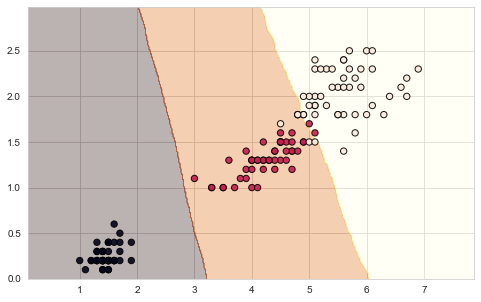

In [13]:
Xv = X_train.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y_train.min(), y_train.max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

fig = plt.figure(figsize=(8,5))

ax = plt.contourf(
    xx, yy, z, cmap='afmhot', alpha=0.3
)
plt.scatter(
    X_train.values[:, 0], X_train.values[:, 1], c=y_train, s=40, 
    alpha=0.9, edgecolors='k'
);